In [1]:
"""
PCA (Principal Component Analysis) is a dimensionality reduction 
technique used in machine learning and statistics.
 Its main goal is to reduce the number of features (dimensions) in a dataset
 while retaining as much variance (information) as possible.
"""

'\nPCA (Principal Component Analysis) is a dimensionality reduction \ntechnique used in machine learning and statistics.\n Its main goal is to reduce the number of features (dimensions) in a dataset\n while retaining as much variance (information) as possible.\n'

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import *
from sklearn.preprocessing import *

In [4]:
milk = pd.read_csv(r"/home/sarthakredasani/Documents/CDAC_ML/Datasets/Datasets/milk.csv", index_col=0)
milk.head(5)

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [5]:
prcomp = PCA().set_output(transform='pandas')
components = prcomp.fit_transform(milk)
components.var()

pca0    282.167328
pca1      8.134316
pca2      1.203587
pca3      0.305746
pca4      0.067737
dtype: float64

In [6]:
np.linalg.eig(milk.cov())

(array([2.82167328e+02, 8.13431563e+00, 1.20358727e+00, 3.05746432e-01,
        6.77367465e-02]),
 array([[-0.76163901,  0.15607203,  0.57443881, -0.25593731, -0.00798022],
        [ 0.16060436, -0.85368037,  0.26796098, -0.39275281, -0.13920564],
        [ 0.62047078,  0.44299977,  0.5524443 , -0.33676547,  0.01270931],
        [-0.09474321,  0.18224371, -0.53829678, -0.816355  ,  0.04015019],
        [ 0.01232867, -0.13194613,  0.05708616, -0.01987089,  0.9893354 ]]))

In [7]:
# Variances of created principal component columns are eign values of variance
# covariance matrix of that data

In [8]:
prcomp.explained_variance_

array([2.82167328e+02, 8.13431563e+00, 1.20358727e+00, 3.05746432e-01,
       6.77367465e-02])

In [9]:
tot_var = np.sum(prcomp.explained_variance_)
tot_var

291.8787143333331

In [10]:
# Proportion of variation explained

In [11]:
prcomp.explained_variance_/tot_var

array([9.66728009e-01, 2.78688210e-02, 4.12358699e-03, 1.04751192e-03,
       2.32071553e-04])

In [12]:
# % age of variation explained

In [14]:
(prcomp.explained_variance_/tot_var)*100

array([9.66728009e+01, 2.78688210e+00, 4.12358699e-01, 1.04751192e-01,
       2.32071553e-02])

In [15]:
#  OR

In [16]:
prcomp.explained_variance_ratio_ *100         

array([9.66728009e+01, 2.78688210e+00, 4.12358699e-01, 1.04751192e-01,
       2.32071553e-02])

In [17]:
# Cumulative

In [18]:
a = np.array([6,4,7,8])
np.cumsum(a)

array([ 6, 10, 17, 25])

In [19]:
np.cumsum(prcomp.explained_variance_ratio_ *100 )

array([ 96.67280086,  99.45968295,  99.87204165,  99.97679284,
       100.        ])

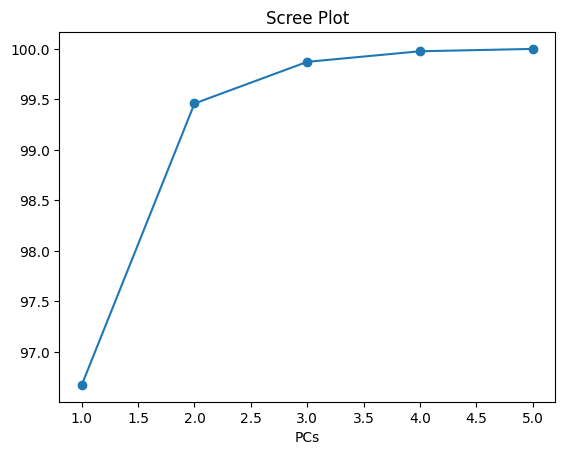

In [20]:
plt.scatter([1,2,3,4,5], np.cumsum(prcomp.explained_variance_ratio_ *100))
plt.plot([1,2,3,4,5], np.cumsum(prcomp.explained_variance_ratio_ *100))
plt.xlabel("PCs")
plt.title("Scree Plot")
plt.show()